In [171]:
import pandas as pd
import numpy as np
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [172]:
train_data = pd.read_excel("Data_train.xlsx")

In [173]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [174]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [175]:
# getting the info of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [176]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [177]:
train_data["Total_Stops"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [178]:
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [179]:
train_data.dropna(inplace = True)

In [180]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [181]:
#creating a copy of the data frame
data = train_data.copy()

In [182]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [183]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [184]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [185]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [186]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
    change_into_Datetime(feature)

In [187]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [188]:
# extracting date of jounery feature
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_year'] = data['Date_of_Journey'].dt.month

In [189]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-07 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-07 05:50:00,2025-02-07 13:15:00,7h 25m,2 stops,No info,7662,1,5,5


In [190]:
# converting the dep_time to an ML algorithm readable form(integer)
def extract_hour_min(df, col):
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute
    return df.head(3)

In [191]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [192]:
extract_hour_min (data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-07 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,3,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-07 05:50:00,2025-02-07 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-07 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,6,9,25


In [193]:
extract_hour_min (data, 'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-07 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-07 05:50:00,2025-02-07 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-07 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,6,9,25,4,25


In [194]:
#dropping the departure time and the arrival time
cols_to_drop=['Arrival_Time', 'Dep_Time']
data.drop(cols_to_drop, axis = 1, inplace = True)

In [195]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,6,9,25,4,25


In [196]:
#checking the numbers of rows and columns
data.shape

(10682, 16)

In [197]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [198]:
#visual representation of the data

In [199]:
def flight_dep_time(x):
    if (x > 4) and (x<= 8):
        return "Early morning"
    elif (x > 8) and (x<= 12):
        return "Morning"
    elif (x > 12) and (x<=16):
        return "Afternoon"
    elif (x > 16) and (x <= 20):
        return "Evening"
    elif(x>20) and (x<=24):
        return "night"
    else:
        return "Late night"

<Axes: xlabel='Dep_Time_hour'>

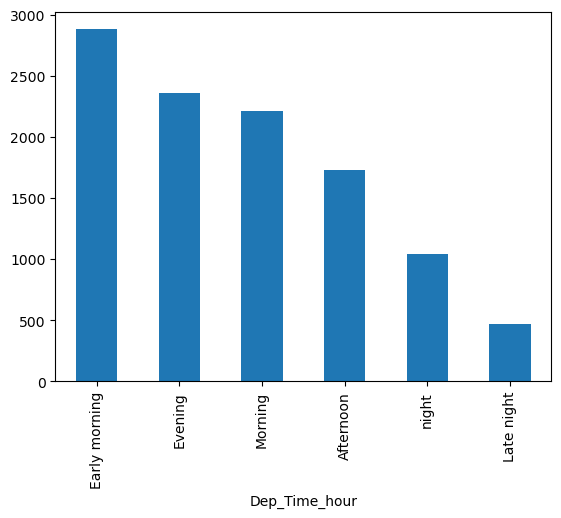

In [200]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = 'bar')

In [201]:
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected = True)
cf.go_offline()

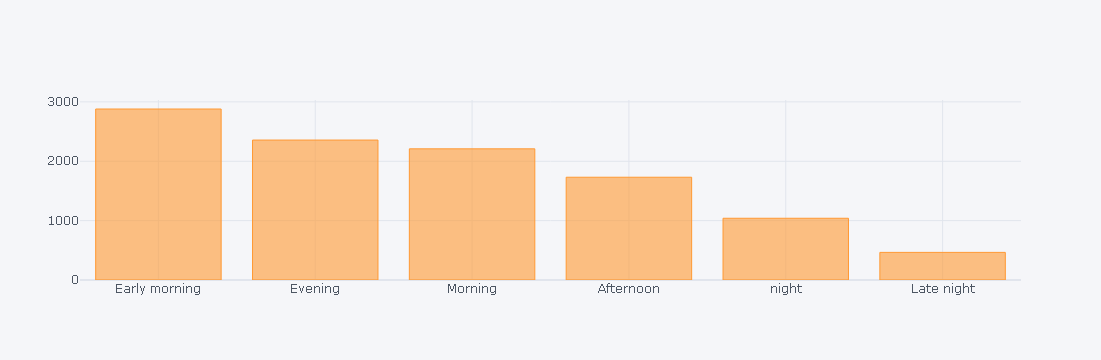

In [202]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind = 'bar')

In [203]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,6,9,25,4,25


In [204]:
# performing preprocessing on duration feature.

def preprocessing_duration(x):
    if 'h' not in x :
        x = '0h' + ' ' + x
    elif 'm' not in x :
        x= x + ' ' + '0m'
    return x
        

In [205]:
data['Duration'] = data['Duration'].apply(preprocessing_duration)


In [206]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [207]:
data['Duration'][0]

'2h 50m'

In [208]:
'2h 50m'.split(' ')


['2h', '50m']

In [209]:
'2h 50m'.split(' ')[0]


'2h'

In [210]:
data['Duration_hours']=data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))


In [211]:
data['Duration_mins']=data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))


In [212]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,3,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,6,9,25,4,25,19,0


In [213]:
# analysing if duration impact price or not
# first converts all the time to minute

data['Duration_total_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [214]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

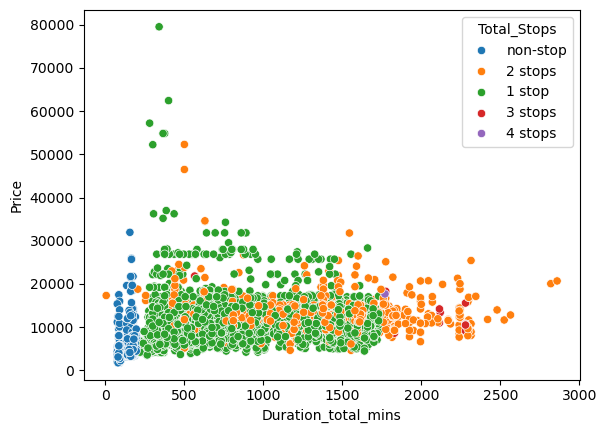

In [215]:
sns.scatterplot(x = 'Duration_total_mins' , y = 'Price' , hue = 'Total_Stops',  data= data )

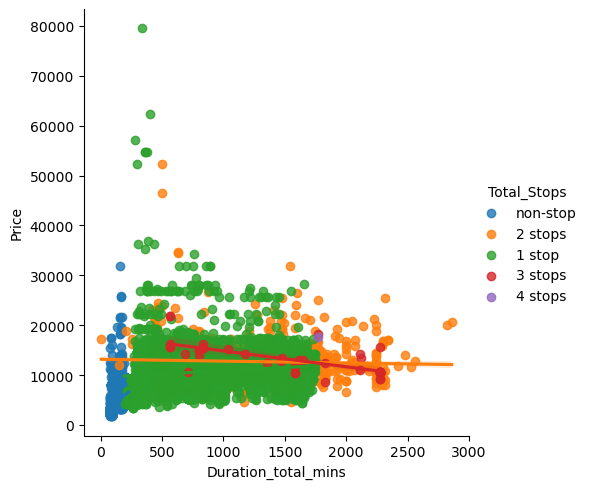

In [216]:
sns.lmplot(x = 'Duration_total_mins' , y = 'Price' , hue = 'Total_Stops',  data= data )

In [217]:
# to get the route in which jet airways is extremely used

In [218]:
data['Airline'] == 'Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [219]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [220]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

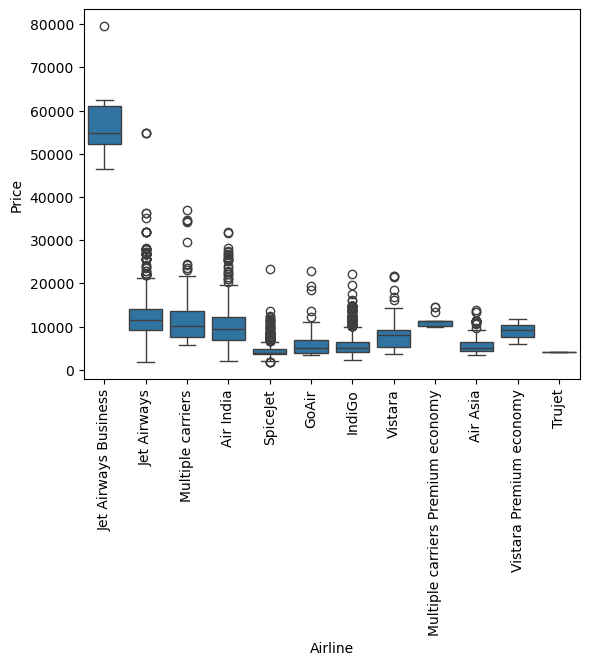

In [221]:
sns.boxplot(y = 'Price' , x = 'Airline', data= data.sort_values('Price', ascending = False))
plt.xticks(rotation = 'vertical')
plt.show

In [222]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [223]:
num_col = [col for col in data.columns if data[col].dtype != 'object']

In [224]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [225]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [226]:
data['Source'].apply(lambda x : 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [227]:
for sub_category in data['Source'].unique():
    data['Source'+sub_category] = data['Source'].apply(lambda x : 1 if x == sub_category else 0)

In [228]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [229]:
# finding the mean

In [230]:
data['Airline'].nunique()

12

In [231]:
data.groupby(['Airline']) ['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [232]:
# converting to dictionary

data.groupby(['Airline']) ['Price'].mean().sort_values().index

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [233]:
airlines = data.groupby(['Airline']) ['Price'].mean().sort_values().index

In [234]:
dick_airlines = {key:index for index, key in enumerate(airlines, 0)}

In [235]:
dick_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [236]:
data['Airline'] = data['Airline'].map(dick_airlines)

In [237]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [238]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [239]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [240]:
#replacing New Delhi with Delhi
data['Destination'].replace('New Delhi' , 'Delhi', inplace = True)

In [241]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [242]:
# in the above we have only five entries. now we can do feature encoding for he destination.

In [243]:
dest = data.groupby(['Destination']) ['Price'].mean().sort_values().index

In [244]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [245]:
# converting the array into dictionary.

In [246]:
dick_dest = {key:index for index, key in enumerate(dest, 0)}

In [247]:
dick_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [248]:
data['Destination'] = data['Destination'].map(dick_dest)

In [249]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [250]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [251]:
# my destination now has an integer function above.

In [252]:
# performing label encoding, manual encoding on data
# Remove unnecessary features.


In [253]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [254]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [255]:
# this is a ordinal data cause of its order - non-stop, 2 stops, 1 stops, etc
# so because of the ordinal data we can use Label encoding.

In [256]:
stops = {'non-stop':0, '2 stops': 2 , '1 stop': 1 , '3 stops': 3, '4 stops': 4}


In [257]:
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [258]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [259]:
# removing unnecessary feature

In [260]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'SourceBanglore',
       'SourceKolkata', 'SourceDelhi', 'SourceChennai', 'SourceMumbai'],
      dtype='object')

In [261]:
data.drop(columns = ['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins','Source', 'Journey_year'], axis = 1 , inplace = True)

In [262]:
data.head(3)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


In [263]:
data.drop(columns = ['Route'], axis = 1 , inplace = True)

In [264]:
data.head(2)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [265]:
# Duration is a string and should be dropped.
data.drop(columns = ['Duration'], axis = 1, inplace = True)

In [266]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


In [267]:
# handling outliers

def plot (df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)

    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)
    sns.distplot(df[col], ax = ax3, kde = False)

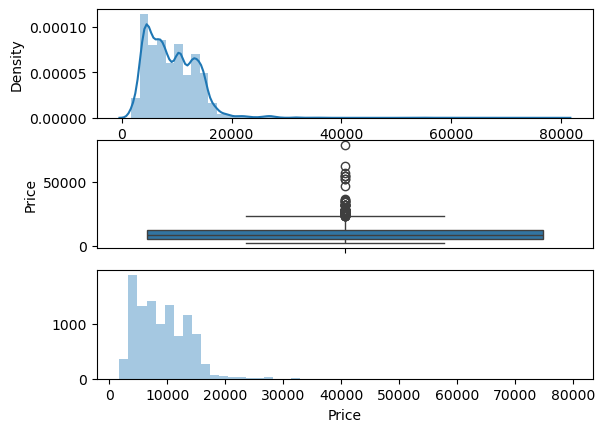

In [268]:
plot(data, 'Price')

In [269]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [270]:
print(maximum)

23017.0


In [271]:
print(minimum)

-5367.0


In [272]:
print([price for price in data['Price'] if price> maximum or price <minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [273]:
len([price for price in data['Price'] if price> maximum or price <minimum])

94

In [274]:
data['Price'] = np.where(data['Price'] >= 35000, data['Price'].median(), data['Price'])

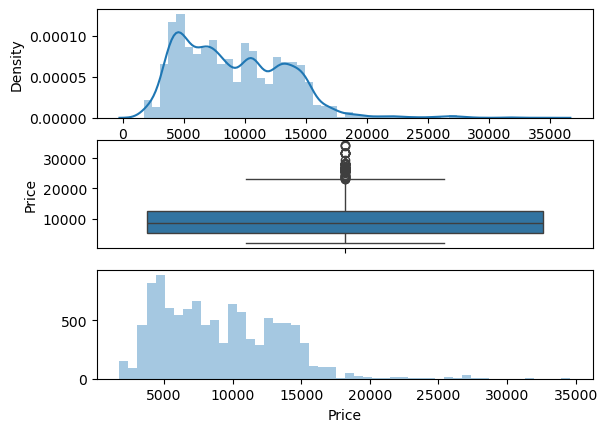

In [275]:
plot(data, 'Price')

In [276]:
# performong feature selection
#first i want to drop the price feature cause it is an independent data frame.

In [277]:
x = data.drop(['Price'], axis =1 )

In [278]:
y = data['Price']

In [279]:
from sklearn.feature_selection import mutual_info_regression

In [280]:
imp = mutual_info_regression(x,y)

In [281]:
imp

array([0.97045106, 1.01324937, 0.80015377, 0.23122556, 0.62149269,
       0.33887351, 0.26302467, 0.39878701, 0.36031189, 0.47347003,
       0.34257402, 0.39052737, 0.46085703, 0.52090863, 0.13291563,
       0.19671196])

In [282]:
#creating the import(imp) in form of a dataframe.
imp_df = pd.DataFrame(imp, index = x.columns)

In [283]:
imp_df.columns = ['importance']

In [284]:
imp_df

,importance
Airline,0.970451
Destination,1.013249
Total_Stops,0.800154
Journey_day,0.231226
Journey_month,0.621493
Dep_Time_hour,0.338874
Dep_Time_minute,0.263025
Arrival_Time_hour,0.398787
Arrival_Time_minute,0.360312
Duration_hours,0.473470


In [285]:
#sorting the dataframe.
imp_df.sort_values (by = 'importance' , ascending = False)

,importance
Destination,1.013249
Airline,0.970451
Total_Stops,0.800154
Journey_month,0.621493
SourceDelhi,0.520909
Duration_hours,0.473470
SourceKolkata,0.460857
Arrival_Time_hour,0.398787
SourceBanglore,0.390527
Arrival_Time_minute,0.360312


In [286]:
#model building

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
x_train, x_test,y_train, y_test = train_test_split( x,y,test_size = 0.25, random_state = 42)

In [289]:
from sklearn.ensemble import RandomForestRegressor

In [290]:
ml_model = RandomForestRegressor()

In [291]:
ml_model.fit(x_train, y_train)

RandomForestRegressor()

In [292]:
y_pred = ml_model.predict(x_test)

In [293]:
y_pred

array([16750.31,  5274.55,  8802.24, ...,  3596.88,  6283.63,  6836.82])

In [294]:
from sklearn import metrics

In [295]:
metrics.r2_score(y_test, y_pred)

0.8124625171909434

In [296]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [297]:
mape(y_test , y_pred)

13.147827836345053

In [298]:
#automating machine learning pipeline

def predict(ml_model):
    model = ml_model.fit(x_train, y_train)
    print('training score : {}'.format(model.score(x_train, y_train)))
    y_predection = model.predict(x_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_predection)
    print('r2_score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test, y_predection)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predection))))
    print('MAPE : {}'.format(mape(y_test, y_predection)))
    sns.distplot(y_test - y_predection)

training score : 0.9513477011885224
predictions are : [16820.4   5418.44  8799.6  ...  3445.02  6245.55  6870.75]


r2_score : 0.8093065477588344
MAE : 1180.4524605789402
MSE: 3712343.787049835
RMSE : 1926.7443491677445
MAPE : 13.227002001252977


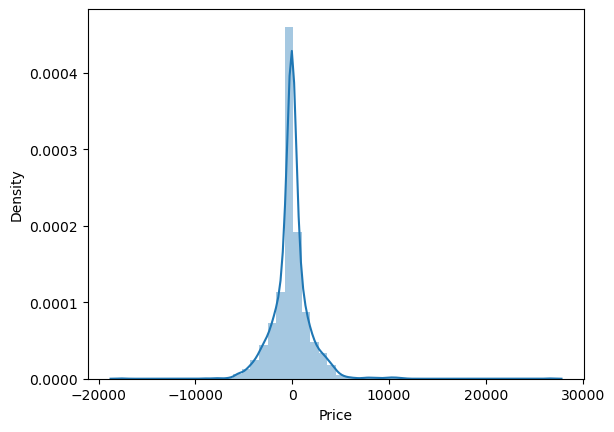

In [299]:
predict(RandomForestRegressor())

In [300]:
from sklearn.tree import DecisionTreeRegressor

training score : 0.966591628243878
predictions are : [16840.  4959.  8610. ...  3419.  5797.  6442.]


r2_score : 0.6789630337478195
MAE : 1401.234094596281
MSE: 6249819.136801655
RMSE : 2499.963827098635
MAPE : 15.432937937781016


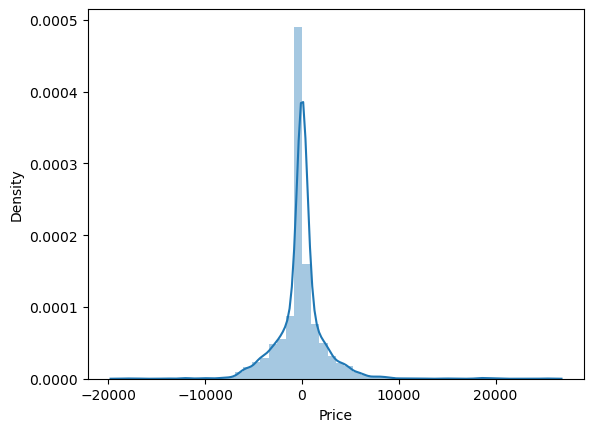

In [301]:
predict(DecisionTreeRegressor())

In [302]:
from sklearn.naive_bayes import GaussianNB

training score : 0.47622019722881037
predictions are : [16840.  4959.  8452. ...  4077.  5797.  6818.]


r2_score : 0.6530652796223684
MAE : 1495.4129539498315
MSE: 6753986.246349682
RMSE : 2598.843251592847
MAPE : 16.562354149920694


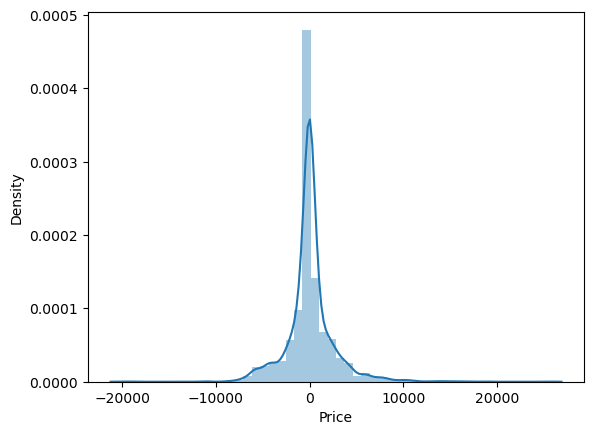

In [303]:
predict(GaussianNB())

In [304]:
#hypertuning machine learning model.

In [305]:
from sklearn.model_selection import RandomizedSearchCV

In [306]:
reg_rf = RandomForestRegressor()

In [307]:
np.linspace(start = 100, stop = 1200, num = 6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [308]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 6)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 4)]
min_sample_split = [5,10,15,100]

In [309]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_sample_split' : min_sample_split,
    
}

In [310]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_sample_split': [5, 10, 15, 100]}

In [322]:
rf_random = RandomizedSearchCV ( estimator = reg_rf, param_distributions = random_grid, cv=3, n_jobs =-1, verbose=2)